In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
baselines = pickle.load(open('results/baselines_aperiodic_collision_3gpp_deadline6.p', 'rb'))

In [3]:
baselines

{'random_scheduler': array([[0.9159126 , 0.91526759, 0.916268  , 0.91899842, 0.91573624],
        [0.91840955, 0.9193861 , 0.91997443, 0.92069184, 0.92549935],
        [0.79423629, 0.78906269, 0.79830916, 0.79631386, 0.79300455],
        [0.5752572 , 0.58062851, 0.57609268, 0.58196419, 0.58261152],
        [0.38779667, 0.38141171, 0.38925148, 0.38826724, 0.3821414 ]]),
 'edf_scheduler': array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]),
 'aloha': array([[0.99980305, 0.9998048 , 0.99980475, 0.9998776 , 0.99987757],
        [0.98905047, 0.99263167, 0.98936625, 0.99121199, 0.99057296],
        [0.93107134, 0.9328105 , 0.92692279, 0.92991165, 0.92946176],
        [0.81191843, 0.81150979, 0.81301405, 0.80998196, 0.81252908],
        [0.68419657, 0.68399848, 0.68581299, 0.68425806, 0.68325381]]),
 'log': {'random_seed': 42,
  'episode_length': 200,
  'max_simultaneous_devices': 3,
  'traffic_m

In [4]:
nomappo = pickle.load(open('results/nomappo_aperiodic_collision_3gpp.p', 'rb'))
nomappo_no_prior = pickle.load(open('results/nomappo_aperiodic_collision_3gpp_no_prior.p', 'rb'))

In [11]:
nomappo['scores_nomappo'][:,0,0]

array([1.        , 1.        , 0.99971471, 0.99617694, 0.97719259])

In [6]:
nomappo_no_prior['scores_nomappo'][:,0]

array([1.        , 0.99673434, 0.97526069, 0.87376564, 0.64454625])

In [9]:
nppo = np.array([1., 1., 1., 0.9931465123362778, 0.9445454992379922])

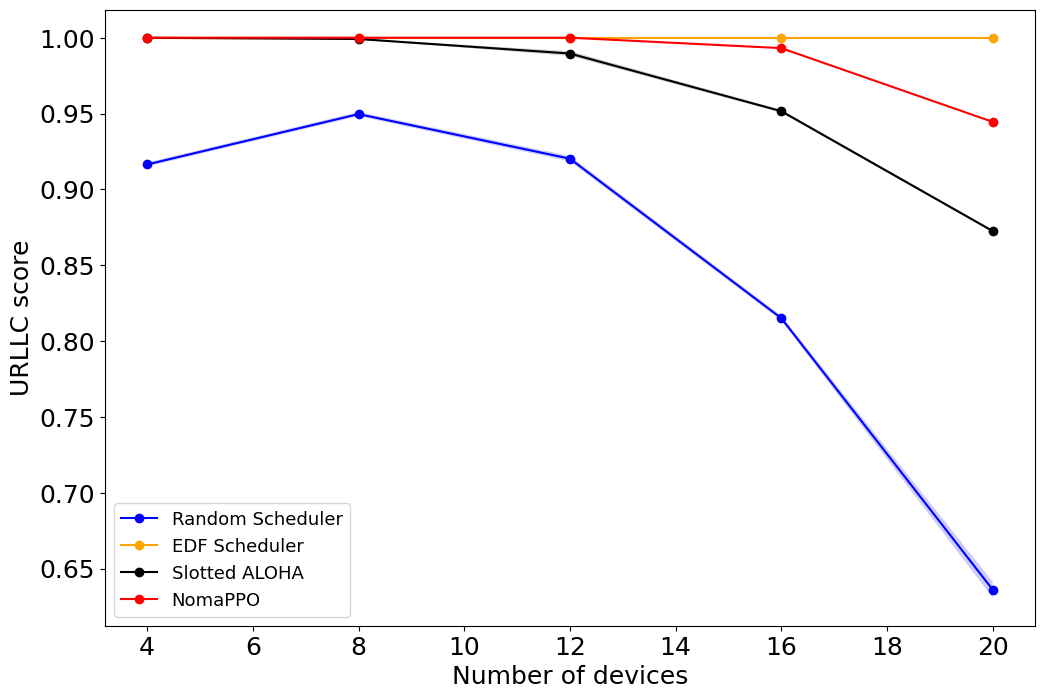

In [10]:
ns = baselines['log']["k_list"]
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(ns, np.array(baselines['random_scheduler']).mean(1), label='Random Scheduler', marker='o', color='blue')
ax.fill_between(ns,
               np.array(baselines['random_scheduler']).mean(1) + np.array(baselines['random_scheduler']).std(1),
               np.array(baselines['random_scheduler']).mean(1) - np.array(baselines['random_scheduler']).std(1),
               facecolor='blue',
               alpha=0.2)

#ax.plot(ns, np.array(nomappo).mean(1), label='NOMA PPO', marker='o', color='red')
#ax.fill_between(ns,
#               np.array(nomappo).mean(1) + np.array(nomappo).std(1),
#               np.array(nomappo).mean(1) - np.array(nomappo).std(1),
#               facecolor='red',
#               alpha=0.2)
#

ax.plot(ns, np.array(baselines['edf_scheduler']).mean(1), label='EDF Scheduler', marker='o', color='orange')
ax.fill_between(ns,
               np.array(baselines['edf_scheduler']).mean(1) + np.array(baselines['edf_scheduler']).std(1),
               np.array(baselines['edf_scheduler']).mean(1) - np.array(baselines['edf_scheduler']).std(1),
               facecolor='orange',
               alpha=0.2)


ax.plot(ns, np.array(baselines['aloha']).mean(1), label='Slotted ALOHA', marker='o', color='black')
ax.fill_between(ns,
               np.array(baselines['aloha']).mean(1) + np.array(baselines['aloha']).std(1),
               np.array(baselines['aloha']).mean(1) - np.array(baselines['aloha']).std(1),
               facecolor='black',
               alpha=0.2)

#ax.plot(ns, nomappo['scores_nomappo'][:,0], label='NomaPPO', marker='o', color='red')
#ax.plot(ns, nomappo_no_prior['scores_nomappo'][:,0], label='NomaPPO no prior', marker='o', color='green')
ax.plot(ns, nppo, label='NomaPPO', marker='o', color='red')


plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


plt.xlabel("Number of devices", fontsize=18)
plt.ylabel("URLLC score", fontsize=18)
plt.legend(fontsize=13)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42 
# plt.savefig('figures/training_throughput.pdf', format='pdf')


In [2]:
edf_distances = pickle.load(open('results/edf_aperiodic_interference_k20_distances.p', 'rb'))

In [4]:
edf_distances

{'distances': [65, 100, 150, 200, 300],
 'scores': array([[1.        , 1.        , 1.        ],
        [1.        , 0.99997547, 1.        ],
        [0.99539182, 0.98029593, 1.        ],
        [0.96716451, 0.92126388, 0.94934788],
        [0.8809936 , 0.88815644, 0.94657894]])}

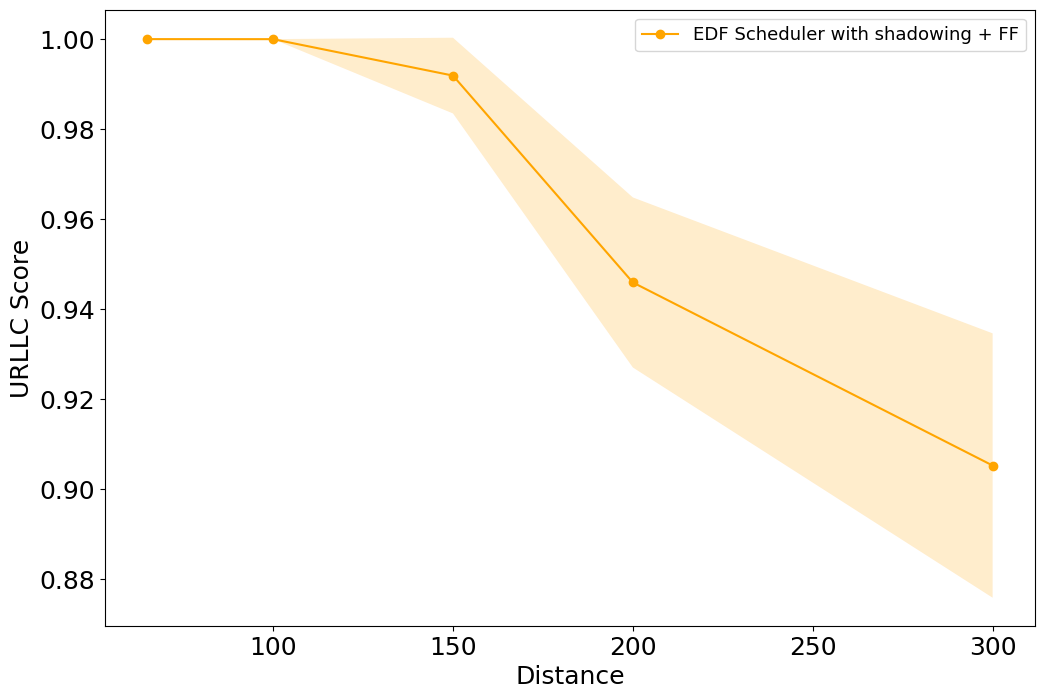

In [3]:
ns = edf_distances['distances']
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

ax.plot(ns, np.array(edf_distances['scores']).mean(1), label='EDF Scheduler with shadowing + FF', marker='o', color='orange')
ax.fill_between(ns,
               np.array(edf_distances['scores']).mean(1) + np.array(edf_distances['scores']).std(1),
               np.array(edf_distances['scores']).mean(1) - np.array(edf_distances['scores']).std(1),
               facecolor='orange',
               alpha=0.2)


plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


plt.xlabel("Distance", fontsize=18)
plt.ylabel("URLLC Score", fontsize=18)
plt.legend(fontsize=13)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42 
# plt.savefig('training_throughput.pdf', format='pdf')


In [26]:
def get_coherence_time(v, ns=6):
    c=3e8
    f=4e9
    v=v*1000/3600
    Ds=2*f*v/c
    Tc=1/(4*Ds)
    Ti=33.33e-6
    Tcp=2.34e-6
    T=Ti+Tcp
    Tf=ns*T
    return Tc/Tf

In [36]:
get_coherence_time(1., 5)

189.23465096719931